In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading data
df=pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1587,28559,Male,2.0,0,0,No,children,Urban,88.54,17.5,Unknown,0
2689,4679,Female,38.0,0,0,Yes,Private,Rural,100.05,20.8,smokes,0
3198,59992,Female,63.0,1,0,Yes,Self-employed,Urban,228.20,37.7,never smoked,0
2054,13964,Female,42.0,0,0,Yes,Private,Rural,107.91,20.5,never smoked,0
2057,1499,Female,43.0,0,0,Yes,Govt_job,Rural,72.13,42.6,never smoked,0
4950,66650,Female,17.0,0,0,No,Private,Urban,68.86,41.1,never smoked,0
3390,46797,Female,31.0,0,0,Yes,Private,Rural,75.82,29.1,never smoked,0
4275,50141,Female,5.0,0,0,No,children,Urban,91.30,20.7,Unknown,0
1741,41007,Female,39.0,0,0,Yes,Private,Urban,60.60,34.2,never smoked,0
2633,72819,Female,82.0,0,0,Yes,Self-employed,Urban,243.59,24.3,never smoked,0


In [4]:
def missing_count(df):
    total=df.isnull().sum().sort_values(ascending=True)
    percent=round(df.isnull().sum().sort_values(ascending=True)/len(df)*100,2)
    return pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_count(df)

,total,percent
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
smoking_status,0,0.00


In [5]:
#缺失值填补（使用决策树填补）
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

DT_bmi_pipe=Pipeline(steps=[('scale',StandardScaler()),
                           ('lr',DecisionTreeRegressor(random_state=42))])
x=df[['age','gender','bmi']].copy()
x.gender=x.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
x.head()

,age,gender,bmi
0,67.0,0,36.6
1,61.0,1,NaN
2,80.0,0,32.5
3,49.0,1,34.4
4,79.0,1,24.0


In [6]:
Missing=x[x.bmi.isna()]
Missing.head()

,age,gender,bmi
1,61.0,1,NaN
8,59.0,1,NaN
13,78.0,0,NaN
19,57.0,0,NaN
27,58.0,0,NaN


In [7]:
x=x[~x.bmi.isna()]
y=x.pop('bmi')


In [8]:
DT_bmi_pipe.fit(x,y)
predicted_bmi=pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.iloc[Missing.index,df.columns.get_loc('bmi')]=predicted_bmi
missing_count(df)

,total,percent
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


In [9]:
#Exploring the data
variables=[i for i in df.columns if i not in ['id','stroke']]
print(variables)
conts=['age','avg_glucose_level','bmi']
print(conts)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
['age', 'avg_glucose_level', 'bmi']


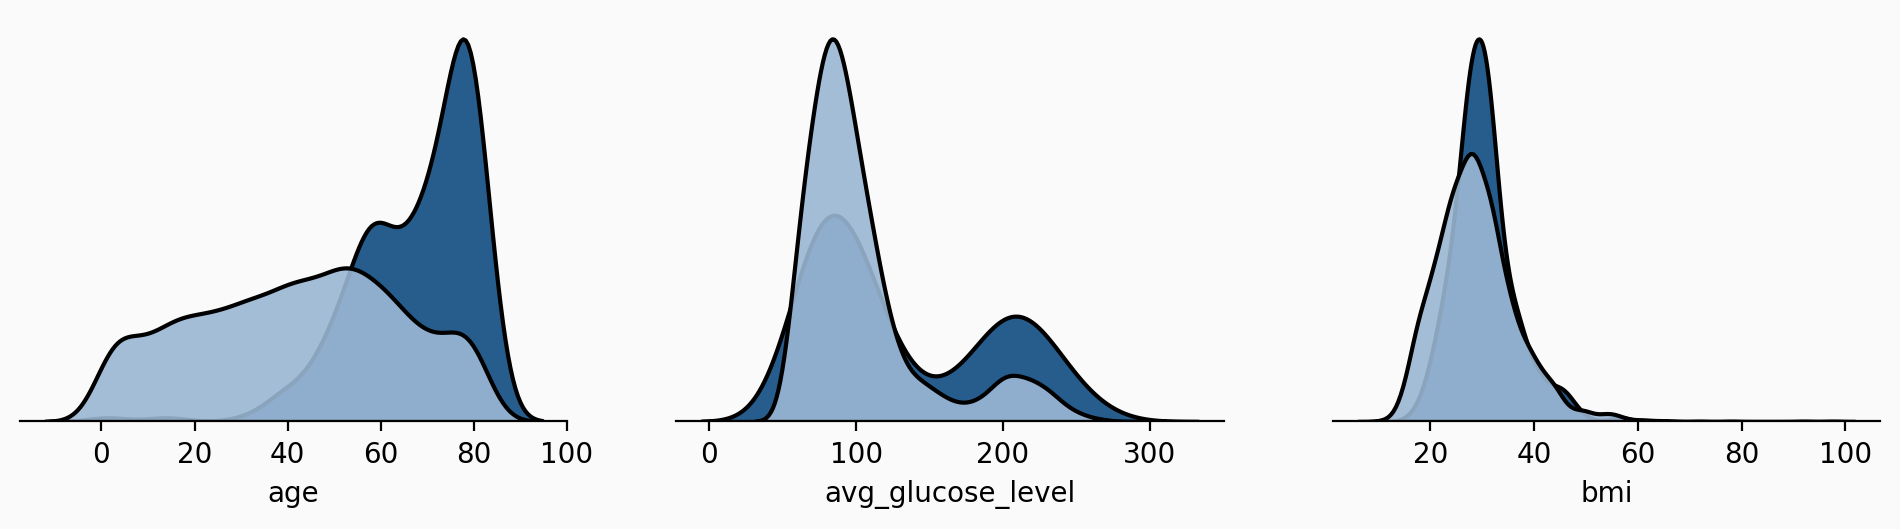

In [10]:
fig=plt.figure(figsize=(12,12),dpi=200,facecolor='#fafafa')
background_color='#fafafa'
gs=fig.add_gridspec(4,3)
plot=0
for row in range(0,1):
    for col in range (0,3):
        locals()["ax"+str(plot)]=fig.add_subplot(gs[row,col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y',left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ['top','right','left']:
            locals()['ax'+str(plot)].spines[s].set_visible(False)
        plot+=1
plot=0
s=df[df['stroke']==1]
ns=df[df['stroke']==0]


for feature in conts:
    sns.kdeplot(s[feature],ax=locals()["ax"+str(plot)],color='#0f4c81',shade=True,
                linewidth=1.5,alpha=.9,zorder=3,legend=False,ec='black')
    sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)],color='#9bb7d4',shade=True,
                linewidth=1.5,alpha=.9,zorder=3,legend=True,ec='black')
    plot+=1

               

In [11]:
str_only=df[df['stroke']==1]
no_str_only=df[df['stroke']==0]
str_only.sample(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
103,4712,Female,81.0,0,1,Yes,Self-employed,Rural,78.70,19.4,Unknown,1
184,28378,Male,61.0,1,1,Yes,Private,Urban,112.24,37.4,smokes,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
191,66071,Male,51.0,1,0,Yes,Private,Urban,112.16,42.5,formerly smoked,1


In [12]:
no_str_only.sample(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2757,20657,Female,67.0,0,0,Yes,Private,Urban,227.96,32.8,Unknown,0
349,1506,Female,48.0,0,0,No,Govt_job,Urban,101.41,20.7,smokes,0
4652,21796,Male,59.0,0,0,Yes,Private,Urban,66.46,39.6,formerly smoked,0
277,36275,Female,54.0,0,0,Yes,Private,Rural,206.72,26.7,never smoked,0


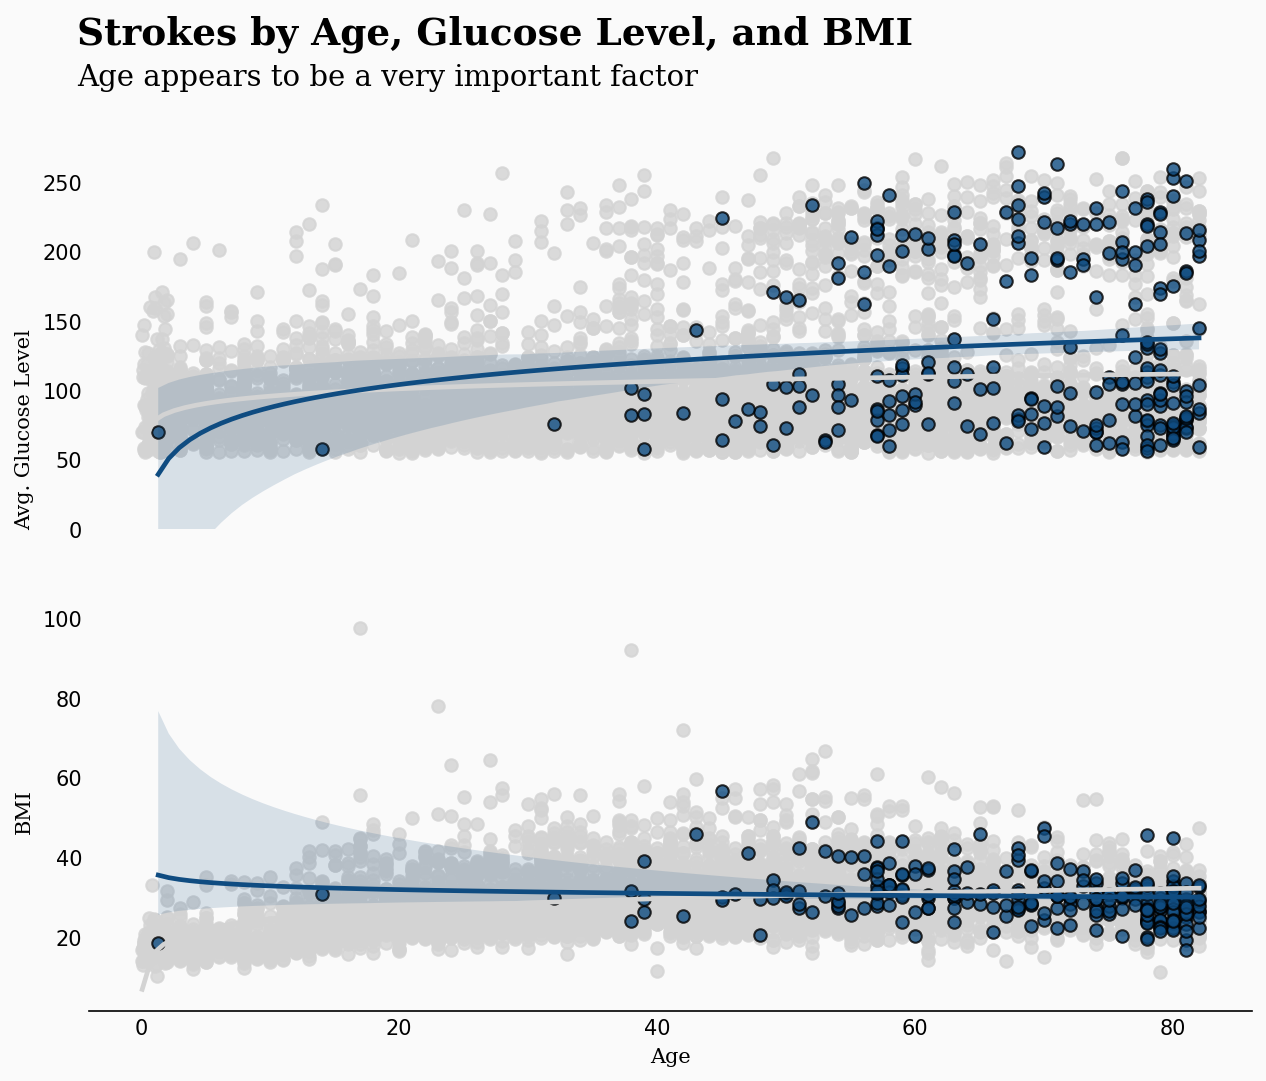

In [13]:


fig = plt.figure(figsize=(10,16),dpi=150,facecolor=background_color) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2])
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

sns.regplot(x=no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(x=str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},ax=ax0)
ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)

    
#BMI
sns.regplot(x=no_str_only['age'],y=no_str_only['bmi'],
           color='lightgray',logx=True,ax=ax1)
sns.regplot(x=str_only['age'],y=str_only['bmi'],
           color='#0f4c81',logx=True,ax=ax1,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1})

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif')

for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)


In [14]:
df['age']=df['age'].astype(int)
rata=[]
age=[]
for i in range(df['age'].min(),df['age'].max()):
    rata.append(df[df['age']<i]['stroke'].sum()/len(df[df['age']<i]['stroke']))
    age.append(i)
rata=pd.DataFrame(rata,columns=['rata'])
age=pd.DataFrame(age,columns=['age'])
rate_age=pd.concat([age,rata],axis=1)
rate_age.head()

,age,rata
0,0,NaN
1,1,0.000000
2,2,0.008333
3,3,0.005714
4,4,0.004525


Text(0, 0.05, 'Risk increase by age')

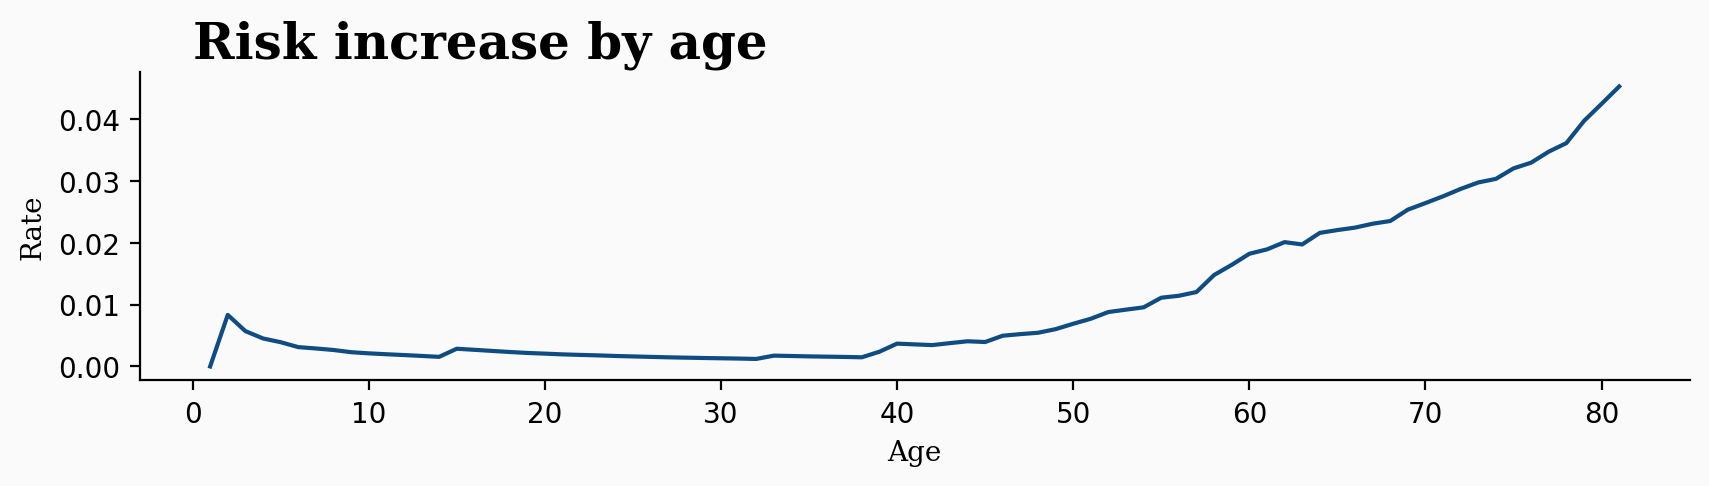

In [15]:
fig=plt.figure(figsize=(10,5),dpi=200,facecolor=background_color)
gs=fig.add_gridspec(2,1)
gs.update(wspace=.11,hspace=.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)

sns.lineplot(data=rate_age,x='age',y='rata',color="#0f4c81",ax=ax0)

for i in ['top','right']:
    ax0.spines[i].set_visible(False)

ax0.set_xlabel("Age",fontsize=10,fontfamily='serif')
ax0.set_ylabel("Rate",fontsize=10,fontfamily='serif')
ax0.text(0,0.05,'Risk increase by age',
         fontsize=18,fontfamily='serif',fontweight='bold')





Text(0.035, 0.68, 'this is around 1 in 20 people [249 out of 5000]')

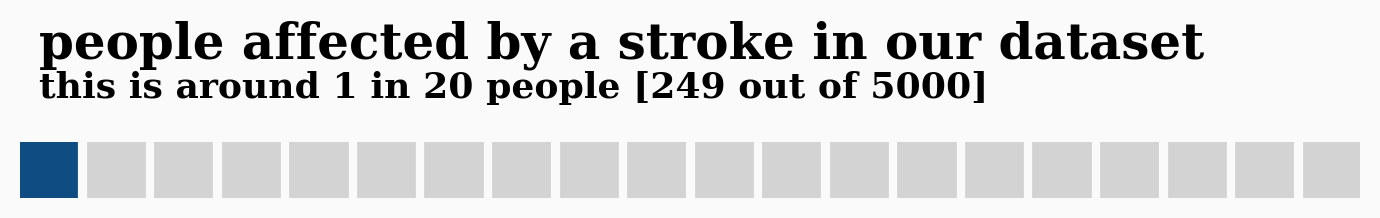

In [16]:
from pywaffle import Waffle
fig=plt.figure(figsize=(7,2),dpi=200,facecolor=background_color,
              FigureClass=Waffle,rows=1,values=[1,19],
              colors=['#0f4c81','lightgray'],
              font_size=20,vertical=True)
fig.text(0.035,0.78,"people affected by a stroke in our dataset",fontsize=18,fontfamily='serif',fontweight='bold')
fig.text(0.035,0.68,"this is around 1 in 20 people [249 out of 5000]",fontsize=13,fontfamily='serif',fontweight='bold')


In [17]:
df[df['gender']=='Other']



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
#drop single 'other' gender
no_str_only=no_str_only[(no_str_only['gender']!='Other')]
no_str_only['gender'].value_counts()

Female    2853
Male      2007
Name: gender, dtype: int64

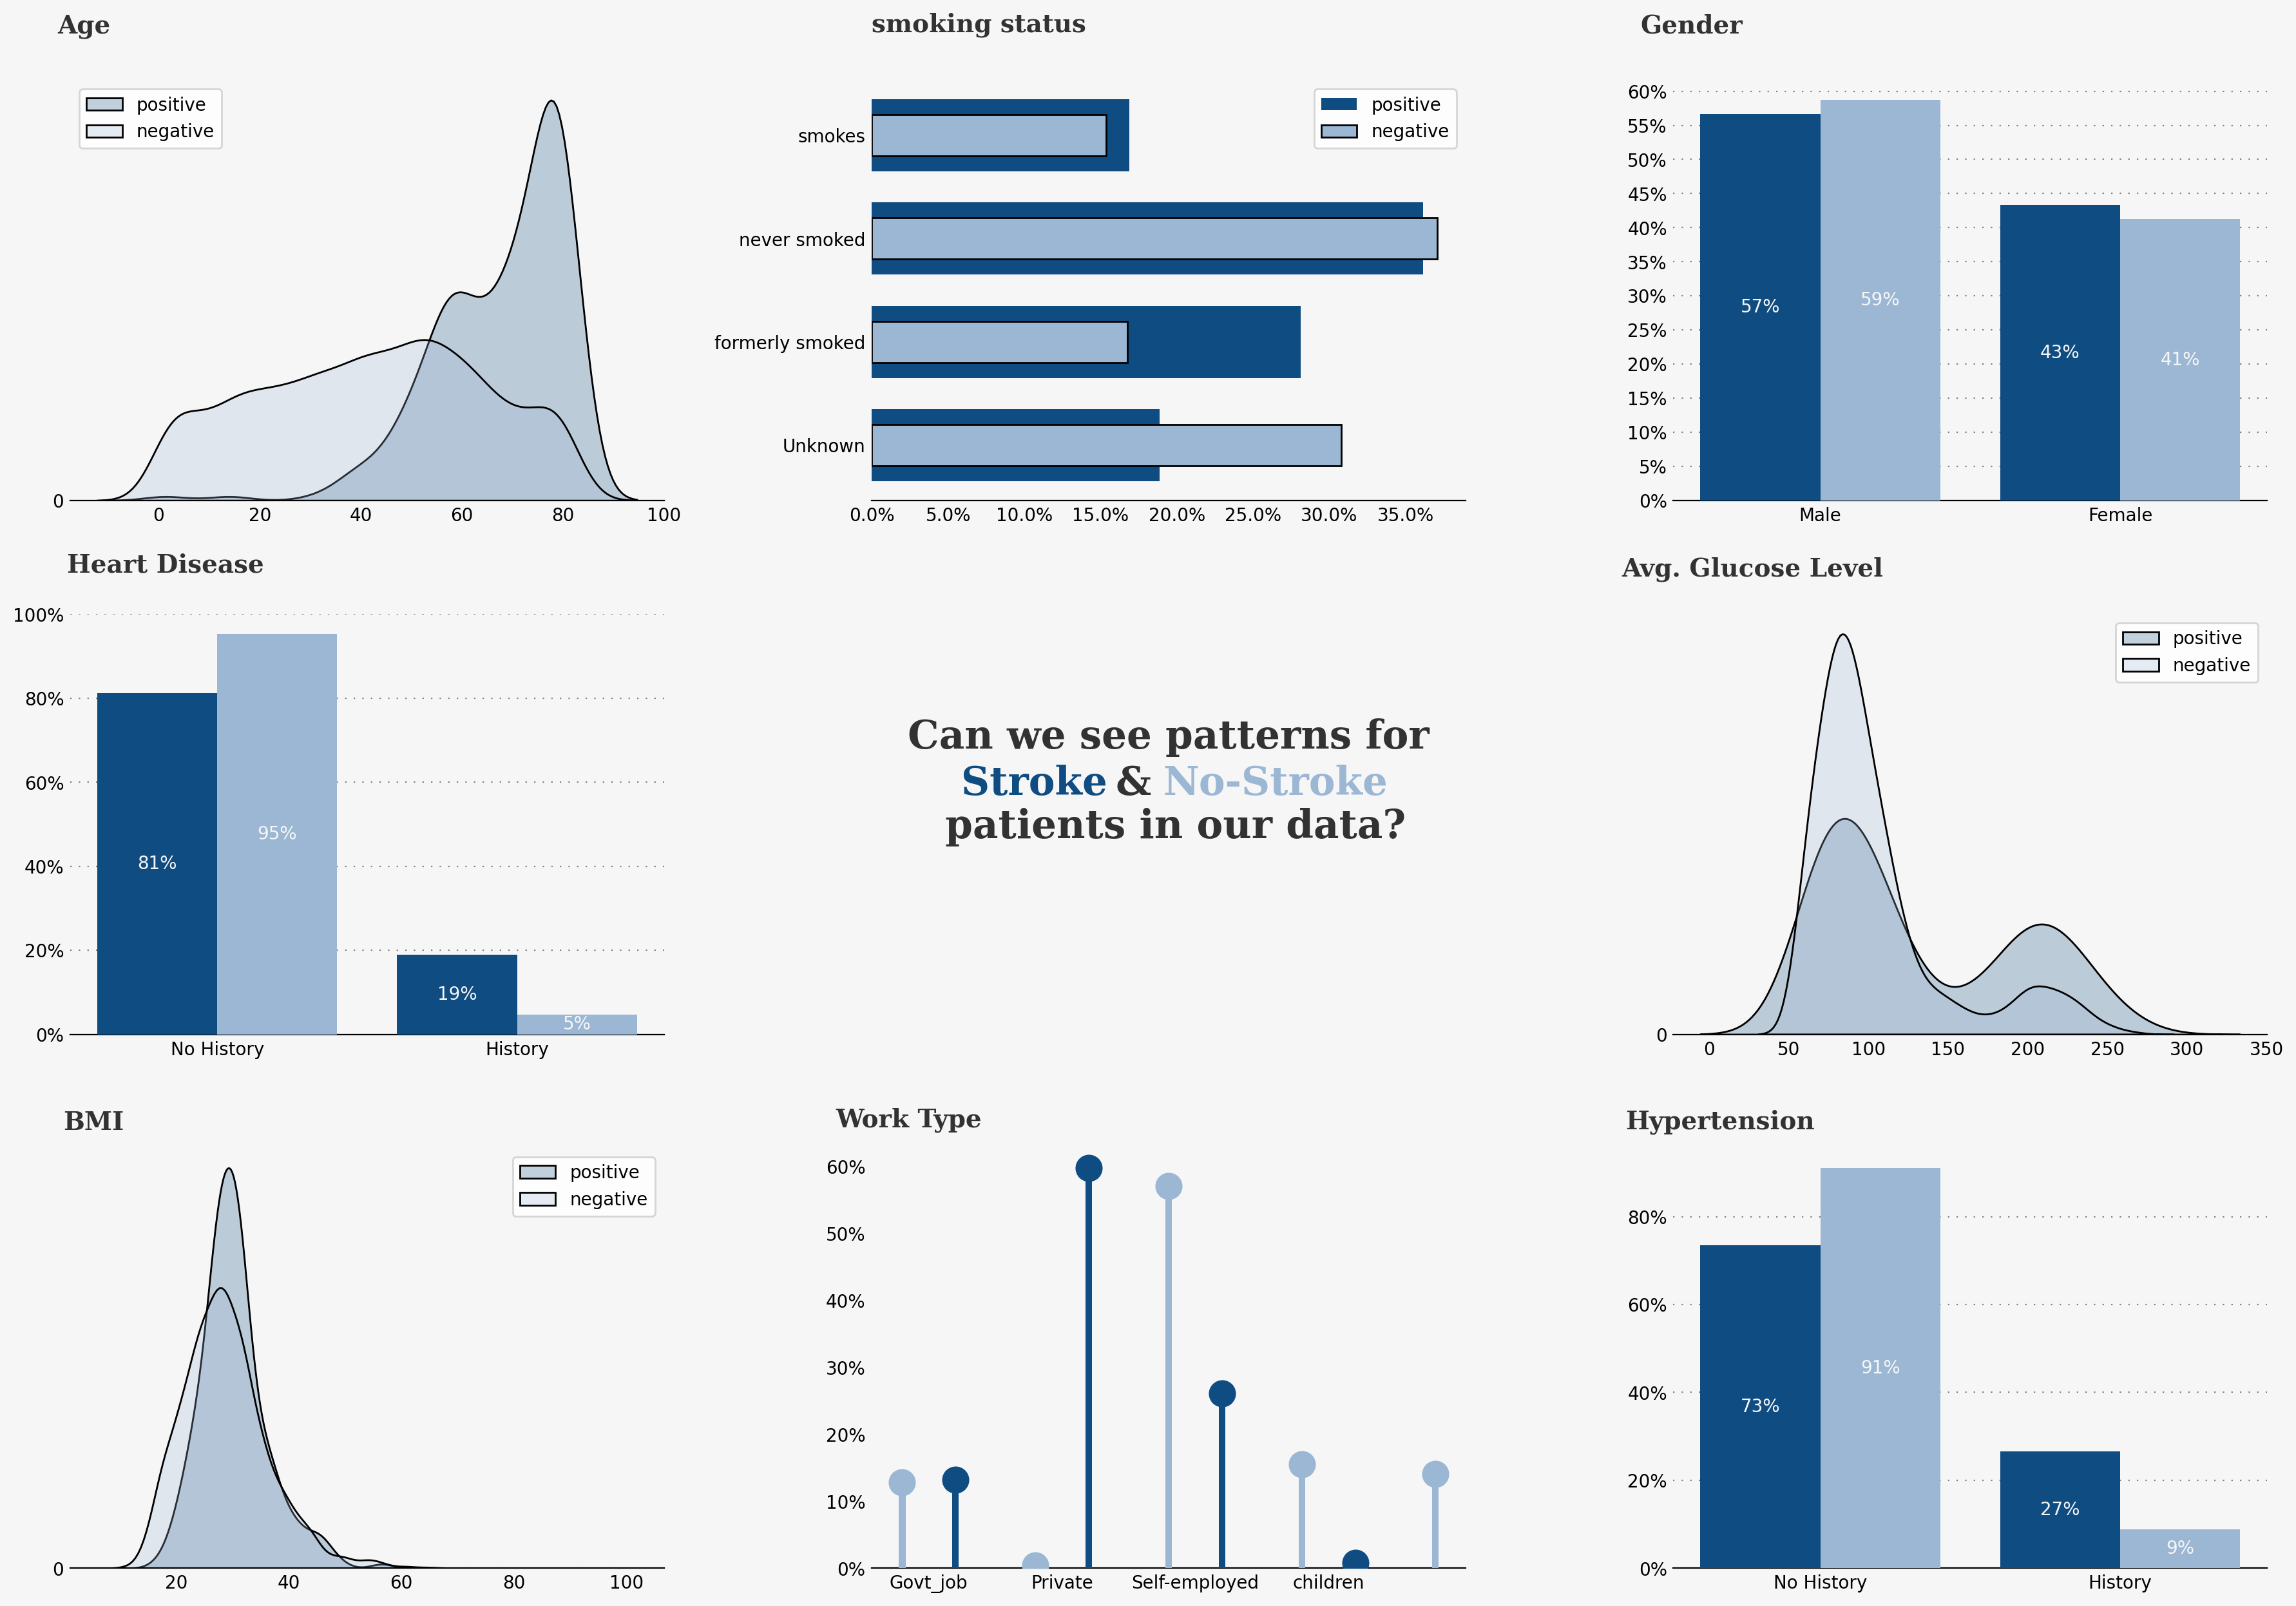

In [19]:
fig = plt.figure(figsize=(22,15),dpi=200)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color


# Plots
## Age
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(str_only["age"], ax=ax0,color="#0f4c81", shade=True, ec='black',label="positive")
sns.kdeplot(no_str_only["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
#ax3.text(0.29, 13, 'Age', 
 #        fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.legend(loc='upper left')

#smoking
positive=pd.DataFrame(str_only['smoking_status'].value_counts())
positive['Percentage']=positive['smoking_status'].apply(lambda x: x/sum(positive['smoking_status'])*100)
positive=positive.sort_index()

negative=pd.DataFrame(no_str_only['smoking_status'].value_counts())
negative['Percentage']=negative['smoking_status'].apply(lambda x: x/sum(negative['smoking_status'])*100)
negative=negative.sort_index()

ax1.text(0,4,'smoking status',fontsize=14,fontweight='bold',fontfamily='serif',color='#323232')
ax1.barh(positive.index,positive['Percentage'],color='#0f4c81',zorder=3,height=.7,label='positive')
ax1.barh(negative.index,negative['Percentage'],color='#9bb7d4',zorder=3,height=.4,ec='black',label='negative')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(5))

#gender
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(5))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

#heart disease
positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))

for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')


# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')
ax5.legend(loc='best')

## BMI


ax6.grid(color='gray', linestyle='--', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')
ax6.legend(loc='best')

# Work Type

positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# hypertension

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 


In [20]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
missing_count(df)

,total,percent
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


In [21]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [22]:
X_train.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
2257,1,71,0,0,0,240.81,27.40000
3729,0,45,0,0,0,99.91,30.90000
473,1,43,0,0,2,70.08,26.60000
21,1,52,1,0,1,233.29,48.90000
2752,1,38,0,0,0,217.55,31.58913


In [23]:
oversample=SMOTE()
X_train_resh,y_train_resh=oversample.fit_resample(X_train,y_train.ravel())
X_train_resh.shape
X_train.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
2257,1,71,0,0,0,240.81,27.40000
3729,0,45,0,0,0,99.91,30.90000
473,1,43,0,0,2,70.08,26.60000
21,1,52,1,0,1,233.29,48.90000
2752,1,38,0,0,0,217.55,31.58913


In [24]:
#random forest, SVM, and logistic regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
                            
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())


Mean f1 scores:
Random Forest mean : 0.9348174788606818
SVM mean : 0.873450267777123
Logistic Regression mean : 0.8214509190784749


## 结果可以看到随即森林的准确性最高

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

rf_pipeline.fit(X_train_resh,y_train_resh)
svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

#X = df.loc[:,X.columns]
#Y = df.loc[:,'stroke']

rf_pred   =rf_pipeline.predict(X_test)
svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)



Mean f1 scores:
RF mean : 0.15985130111524165
SVM mean : 0.154
LR mean : 0.19108280254777069


In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test,rf_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3404
           1       0.12      0.25      0.16       173

    accuracy                           0.87      3577
   macro avg       0.54      0.58      0.55      3577
weighted avg       0.92      0.87      0.89      3577

Accuracy Score:  0.87363712608331


In [27]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

rfc = RandomForestClassifier()
param_grid


{'n_estimators': [64, 100, 128, 200],
 'max_features': [2, 3, 5, 7],
 'bootstrap': [True, False]}

In [28]:
grid = GridSearchCV(rfc,param_grid,cv=10,scoring='f1')

grid.fit(X_train,y_train)

print(grid.best_params_)



{'bootstrap': False, 'max_features': 7, 'n_estimators': 100}


##  最好的参数是'bootstrap': False, 'max_features': 7, 'n_estimators': 200

In [29]:
rfc = RandomForestClassifier(max_features=7,n_estimators=200,bootstrap=True)

rfc.fit(X_train_resh,y_train_resh)

rfc_tuned_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3404
           1       0.12      0.26      0.16       173

    accuracy                           0.87      3577
   macro avg       0.54      0.58      0.54      3577
weighted avg       0.92      0.87      0.89      3577

Accuracy Score:  0.8677662845960302
F1 Score:  0.15985790408525755


In [30]:
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train_resh,y_train_resh)

rfc_tuned_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3404
           1       0.11      0.24      0.15       173

    accuracy                           0.87      3577
   macro avg       0.54      0.57      0.54      3577
weighted avg       0.92      0.87      0.89      3577

Accuracy Score:  0.87279843444227
F1 Score:  0.1527001862197393


In [31]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}

print(log_param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid,cv=10,scoring='f1')

grid.fit(X_train_resh,y_train_resh)

grid.best_params_



{'C': 0.1, 'penalty': 'l2'}

## 最好的参数{'C': 1, 'penalty': 'l2'}

In [33]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))


              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3404
           1       0.11      0.61      0.19       173

    accuracy                           0.75      3577
   macro avg       0.54      0.68      0.52      3577
weighted avg       0.93      0.75      0.82      3577

Accuracy Score:  0.7514677103718199
F1 Score:  0.19108280254777069


In [34]:
#output:
# {'C': 0.1, 'penalty': 'l2'}

# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))


              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3404
           1       0.11      0.61      0.19       173

    accuracy                           0.75      3577
   macro avg       0.54      0.68      0.52      3577
weighted avg       0.93      0.75      0.82      3577

Accuracy Score:  0.7500698909700867
F1 Score:  0.19021739130434784


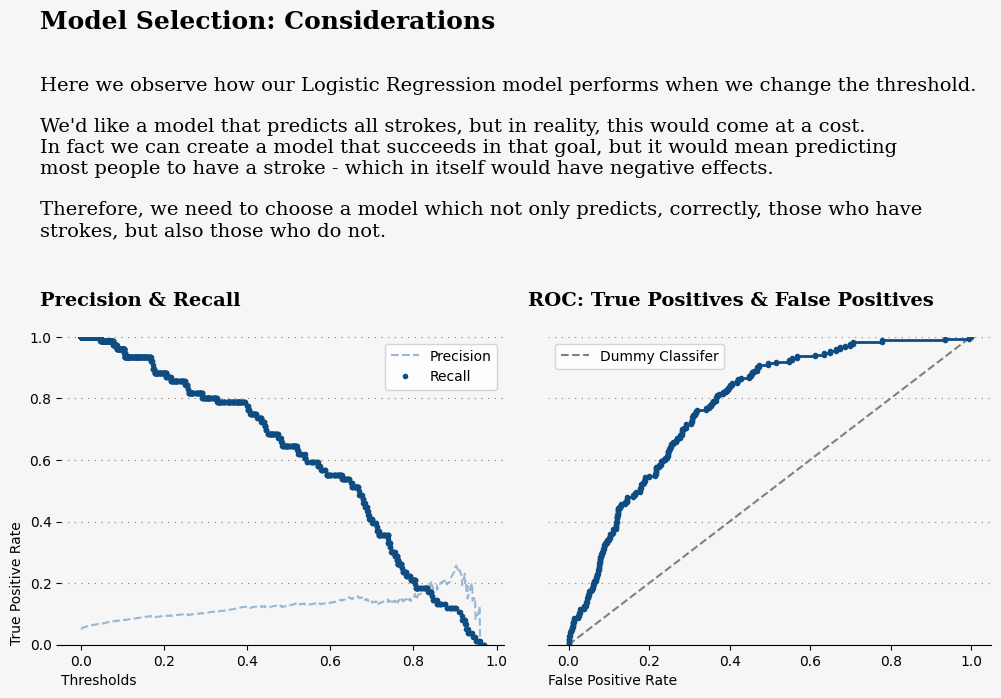

In [35]:
# source code: https://www.kaggle.com/ilyapozdnyakov/rain-in-australia-precision-recall-curves-viz
# heeavily modified plotting

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



# Plots

fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2, wspace=0.1,hspace=0)
ax = gs.subplots()

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color) 
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')
ax[0].plot(thresholds, recalls[:-1], '.', linewidth=1,label='Recall',color='#0f4c81')
ax[0].set_ylabel('True Positive Rate',loc='bottom')
ax[0].set_xlabel('Thresholds',loc='left')
#plt.legend(loc='center left')
ax[0].set_ylim([0,1])
ax[0].legend(loc='best')

# plot the roc curve for the model
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='gray')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,color='#0f4c81')
ax[1].set_xlabel('False Positive Rate',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])
ax[1].legend(loc='best')


for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
    
    
ax[0].text(-0.1,2,'Model Selection: Considerations',fontsize=18,fontfamily='serif',fontweight='bold')
ax[0].text(-0.1,1.26,
'''
Here we observe how our Logistic Regression model performs when we change the threshold.

We'd like a model that predicts all strokes, but in reality, this would come at a cost.
In fact we can create a model that succeeds in that goal, but it would mean predicting
most people to have a stroke - which in itself would have negative effects.

Therefore, we need to choose a model which not only predicts, correctly, those who have
strokes, but also those who do not.
''',fontsize=14,fontfamily='serif')


ax[0].text(-0.1,1.1,'Precision & Recall',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].text(-0.1,1.1,'ROC: True Positives & False Positives',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()


In [39]:
# defining parameter range 
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
             'kernel': ['rbf']} 

svm = SVC(random_state=42)

grid = GridSearchCV(svm,svm_param_grid,cv=10)

grid.fit(X_train_resh,y_train_resh)

grid.best_params_



{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [40]:
#output:
# {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

# Let's use those params now

svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=100,gamma=0.01,kernel='rbf',random_state=42))])

svm_pipeline.fit(X_train_resh,y_train_resh)

svm_tuned_pred   = svm_pipeline.predict(X_test)

print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))



              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3404
           1       0.09      0.48      0.15       173

    accuracy                           0.75      3577
   macro avg       0.53      0.62      0.50      3577
weighted avg       0.92      0.75      0.82      3577

Accuracy Score:  0.7450377411238468
F1 Score:  0.15398886827458255


In [41]:
#output:
# {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

# Let's use those params now

svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1000,gamma=0.01,kernel='rbf',random_state=42))])

svm_pipeline.fit(X_train_resh,y_train_resh)

svm_tuned_pred   = svm_pipeline.predict(X_test)

print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))



              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3404
           1       0.09      0.42      0.14       173

    accuracy                           0.76      3577
   macro avg       0.52      0.60      0.50      3577
weighted avg       0.92      0.76      0.83      3577

Accuracy Score:  0.7592954990215264
F1 Score:  0.14328358208955222


In [44]:
# Make dataframes to plot

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

rf_df.head()


,Random Forest Score
F1,0.159851
Accuracy,0.873637
Recall,0.248555
Precision,0.117808
ROC AUC Score,0.576980


In [45]:
svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svm_df

,Support Vector Machine (SVM) Score
F1,0.154000
Accuracy,0.763489
Recall,0.445087
Precision,0.093108
ROC AUC Score,0.612379


In [46]:
lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
lr_df.head()

,Tuned Logistic Regression Score
F1,0.190217
Accuracy,0.750070
Recall,0.606936
Precision,0.112782
ROC AUC Score,0.682140


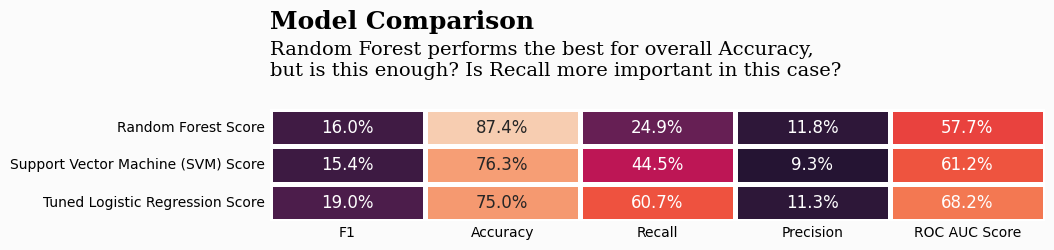

In [48]:
df_models = round(pd.concat([rf_df,svm_df,lr_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Random Forest performs the best for overall Accuracy,\nbut is this enough? Is Recall more important in this case?',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()


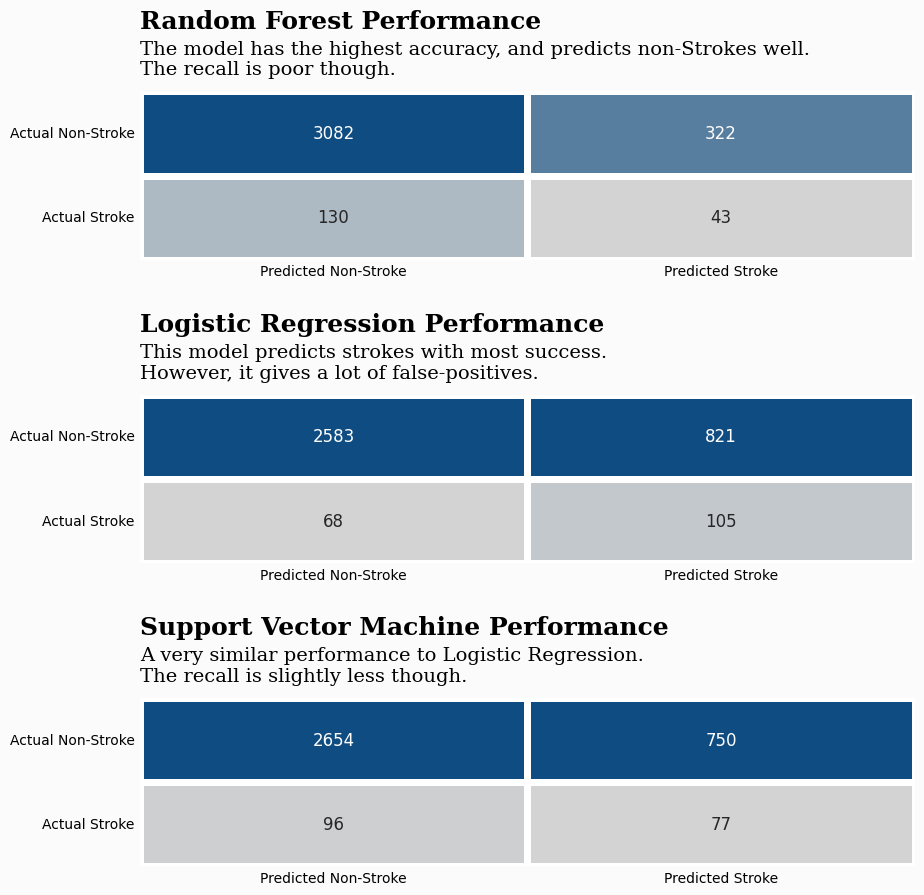

In [49]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})



ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.2,'The model has the highest accuracy, and predicts non-Strokes well.\nThe recall is poor though.',fontsize=14,fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'This model predicts strokes with most success.\nHowever, it gives a lot of false-positives.',fontsize=14,fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.2,'A very similar performance to Logistic Regression.\nThe recall is slightly less though.',fontsize=14,fontfamily='serif')


plt.show()

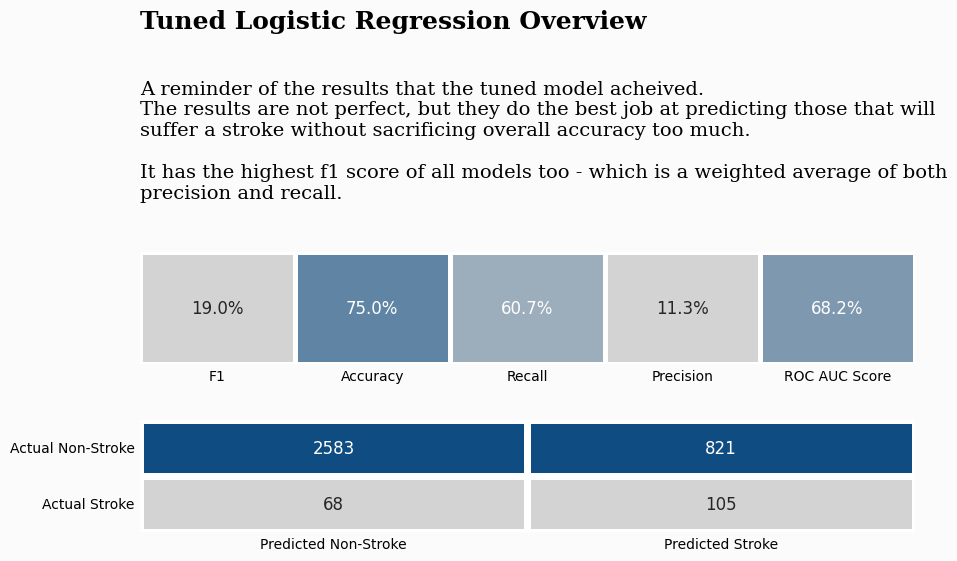

In [50]:
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

sns.heatmap(lr_df.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95,yticklabels='', linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.text(0,-2,'Tuned Logistic Regression Overview',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.3,
'''
A reminder of the results that the tuned model acheived.
The results are not perfect, but they do the best job at predicting those that will
suffer a stroke without sacrificing overall accuracy too much.

It has the highest f1 score of all models too - which is a weighted average of both
precision and recall.
''',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)



# Overall

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],vmax=500,vmin=0,xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()



In [51]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)


fi = rf_feat_importance(rf_pipeline['RF'], X)
fi[:10].style.background_gradient(cmap=colormap)


,Feature,Importance
1,age,0.396207
6,bmi,0.216690
5,avg_glucose_level,0.207081
4,work_type,0.085582
0,gender,0.063378
2,hypertension,0.018852
3,heart_disease,0.012210


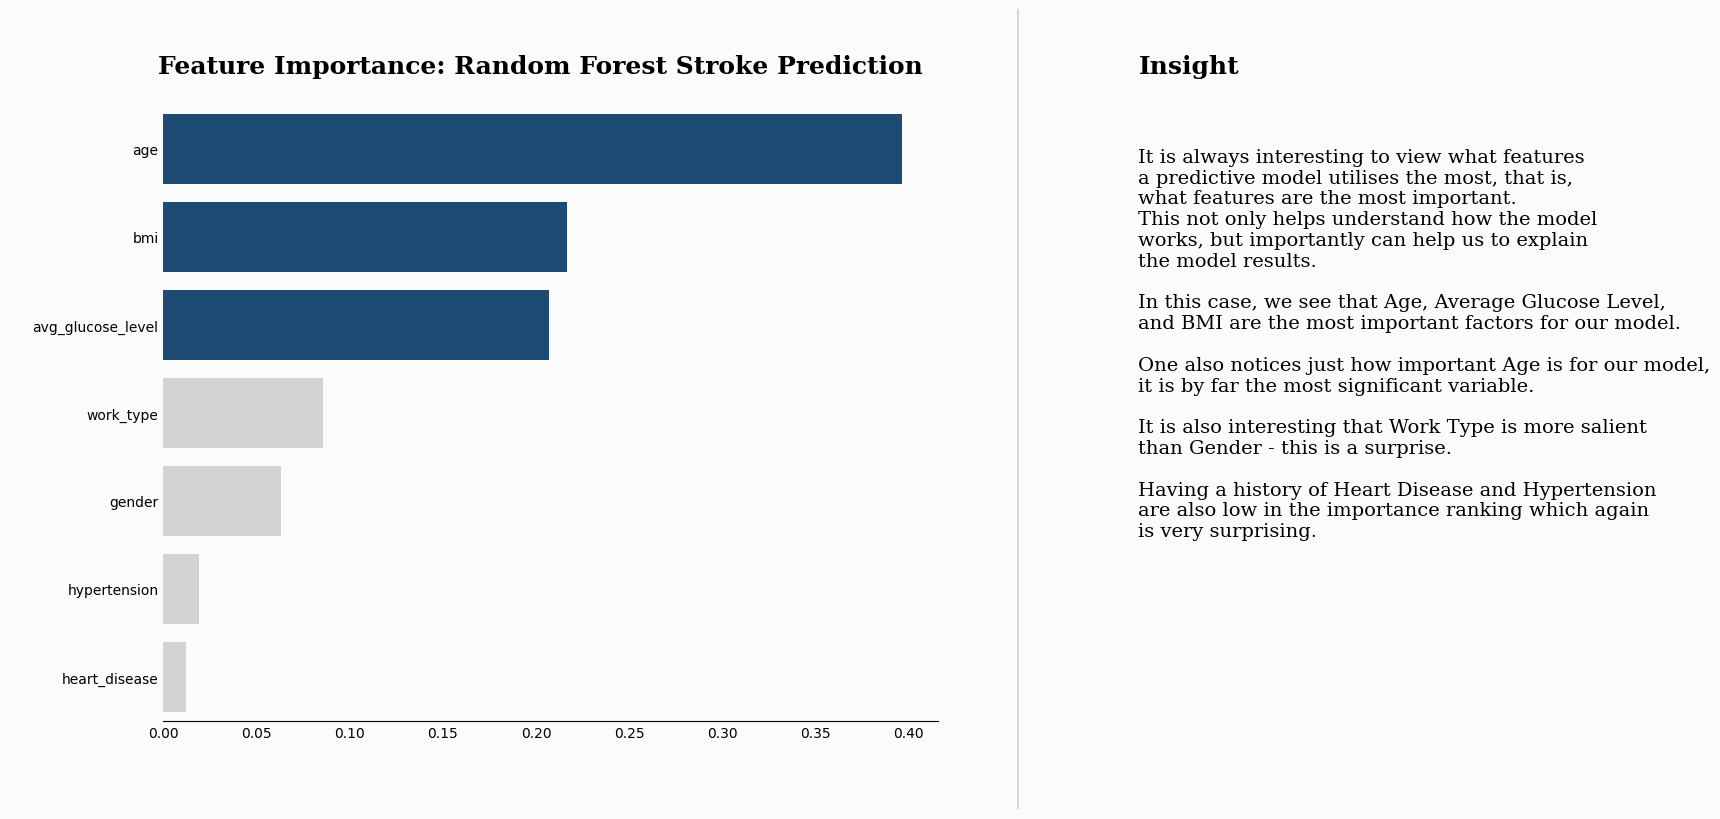

In [56]:
background_color = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 8),facecolor=background_color)

color_map = ['lightgray' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#0f4c81' # color highlight

sns.barplot(data=fi,x='Importance',y='Feature',ax=ax,palette=color_map)
ax.set_facecolor(background_color) 
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
fig.text(0.12,0.92,"Feature Importance: Random Forest Stroke Prediction", fontsize=18, fontweight='bold', fontfamily='serif')

    
plt.xlabel(" ", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel(" ", fontsize=12, fontweight='light', fontfamily='serif')


fig.text(1.1, 0.92, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.315, '''
It is always interesting to view what features
a predictive model utilises the most, that is, 
what features are the most important. 
This not only helps understand how the model
works, but importantly can help us to explain
the model results.

In this case, we see that Age, Average Glucose Level,
and BMI are the most important factors for our model.

One also notices just how important Age is for our model,
it is by far the most significant variable.

It is also interesting that Work Type is more salient
than Gender - this is a surprise.

Having a history of Heart Disease and Hypertension
are also low in the importance ranking which again
is very surprising.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.tick_params(axis=u'both', which=u'both',length=0)


import matplotlib.lines as lines
l1 = lines.Line2D([0.98, 0.98], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

In [62]:
# great resource: https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values
import shap  

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

print(shap_values)

[array([[-3.81794905e-02,  3.14168063e-01, -2.30268675e-03, ...,
        -1.57582542e-02,  5.02736592e-02,  1.84760395e-01],
       [-7.23523396e-02,  3.56179472e-01, -3.85812695e-03, ...,
        -2.07199962e-02,  5.49125401e-02,  7.01792857e-02],
       [ 4.16908795e-02,  1.84589308e-01,  4.30155314e-05, ...,
         1.25093694e-01,  1.97659826e-02,  1.29834239e-01],
       ...,
       [ 9.33642480e-02, -1.56293524e-02, -7.58953714e-03, ...,
        -1.15009905e-02,  1.29519822e-01,  3.12868088e-01],
       [ 2.16002898e-01,  1.19518403e-01, -8.28239719e-03, ...,
        -1.34117043e-02,  1.21934238e-01,  3.20968917e-02],
       [ 3.38013538e-02,  1.88276366e-01, -2.97201112e-03, ...,
         1.17083578e-01,  2.32378870e-02,  1.40782050e-01]]), array([[ 3.81794905e-02, -3.14168063e-01,  2.30268675e-03, ...,
         1.57582542e-02, -5.02736592e-02, -1.84760395e-01],
       [ 7.23523396e-02, -3.56179472e-01,  3.85812695e-03, ...,
         2.07199962e-02, -5.49125401e-02, -7.01792857

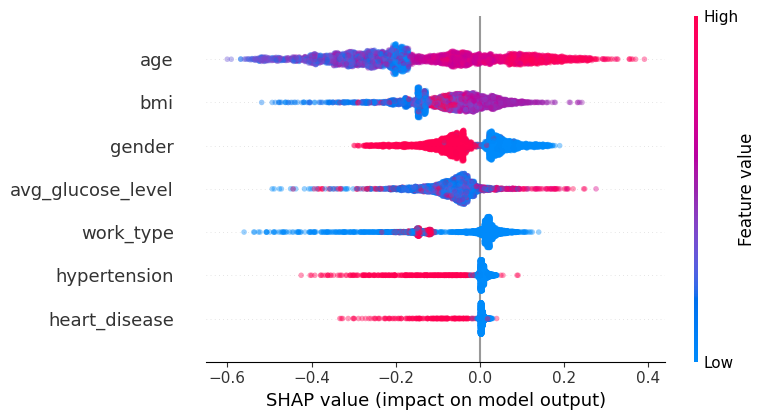

In [65]:
# custom colour plot
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1], X_test,alpha=0.4)

Text(0, 0.5, "SHAP value for the 'Age' feature")

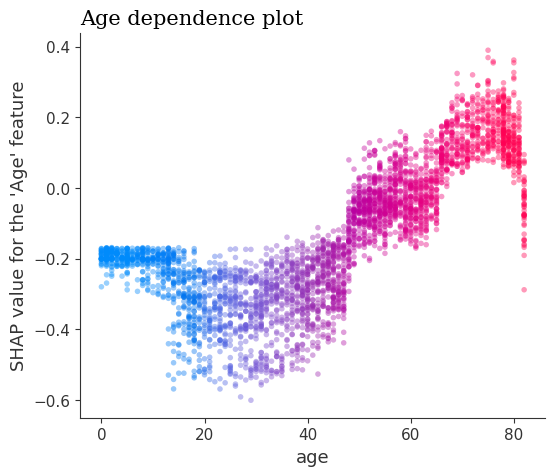

In [66]:
shap.dependence_plot('age', shap_values[1], X_test, interaction_index="age",alpha=0.4,show=False)
plt.title("Age dependence plot",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("SHAP value for the 'Age' feature")

Text(0, 0.5, "SHAP value for the 'Bmi' feature")

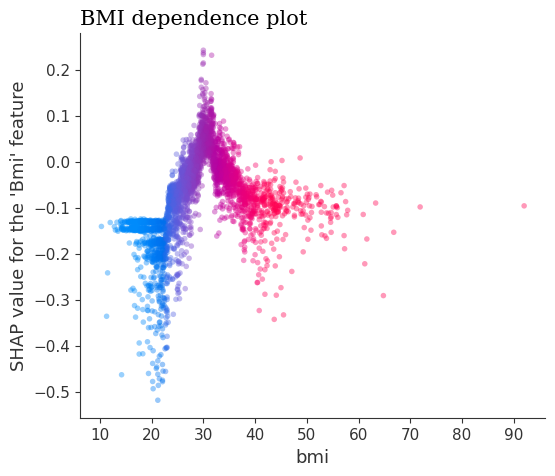

In [68]:
shap.dependence_plot('bmi', shap_values[1], X_test, interaction_index="bmi",alpha=0.4,show=False)
plt.title("BMI dependence plot",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("SHAP value for the 'Bmi' feature")

In [71]:
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['stroke'], verbose=True, mode='classification')

In [72]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp = explainer.explain_instance(X.values[j], logreg_pipeline.predict_proba, num_features=5)
# Show the predictions
exp.show_in_notebook(show_table=True)


Intercept 0.10854042617731038
Prediction_local [0.32274142]
Right: 0.48299159664730507
